In [1]:
import numpy as np

## **Perceptrón**

### Algoritmo de clasificación binaria.

### Unidad básica de una red neuronal artificial.




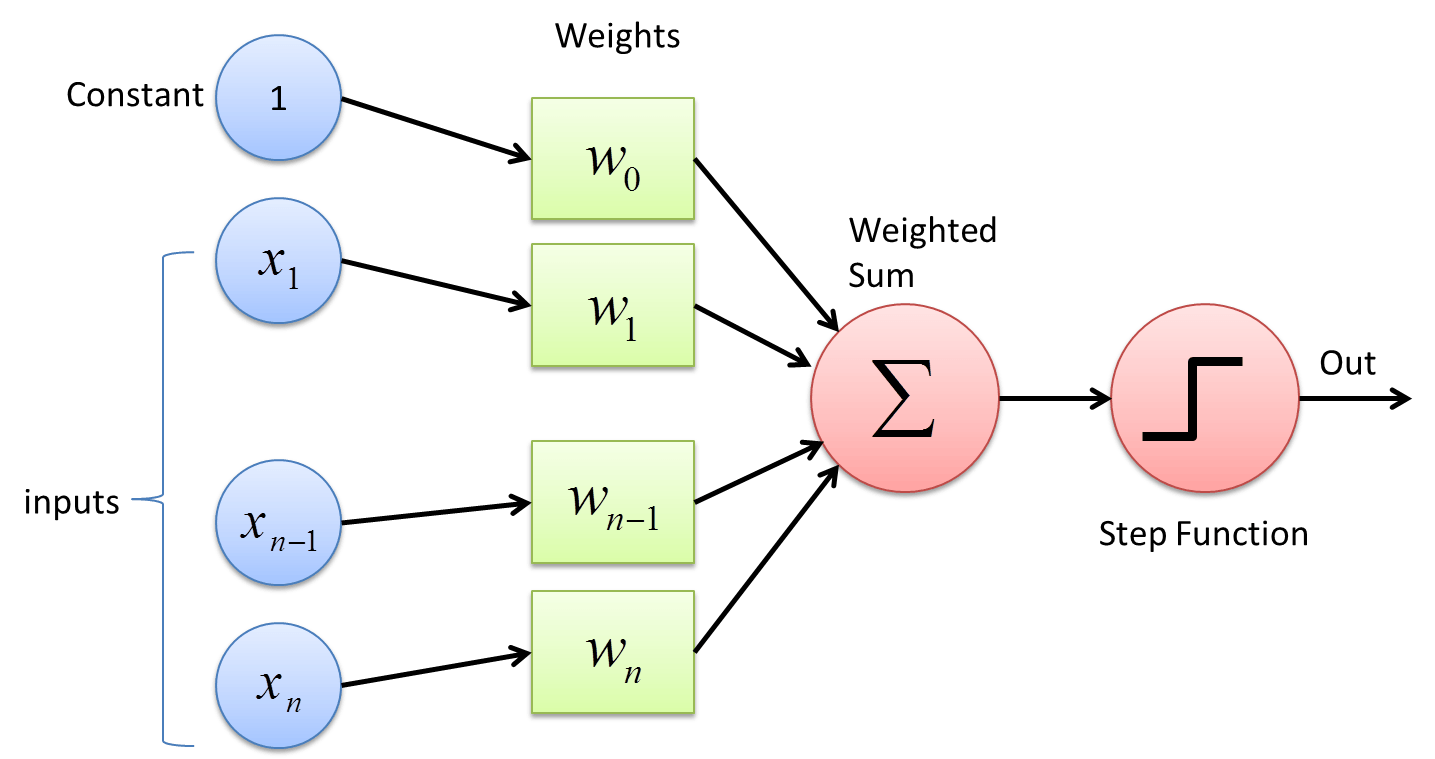



### **El perceptrón hace la sumatoria del producto escalar de los inputs y sus pesos correspondientes**

**Step function**



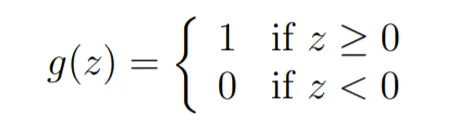



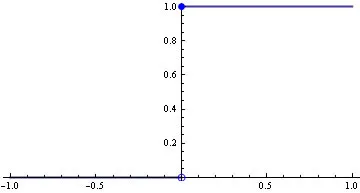

In [2]:
def step_function(z):
  return 1.0 if z >= 0 else 0.0

In [5]:
def perceptron(inputs, weights, bias):
  total = np.dot(weights, inputs) + bias
  return step_function(total)



weights = np.array([0, 0]) # w1 = 0, w2 = 1
bias = -4                   # b = 0

# inputs
x = np.array([2, 3])       # x1 = 2, x2 = 3

#predicción
print(perceptron(x, weights, bias))    # 1.0

0.0


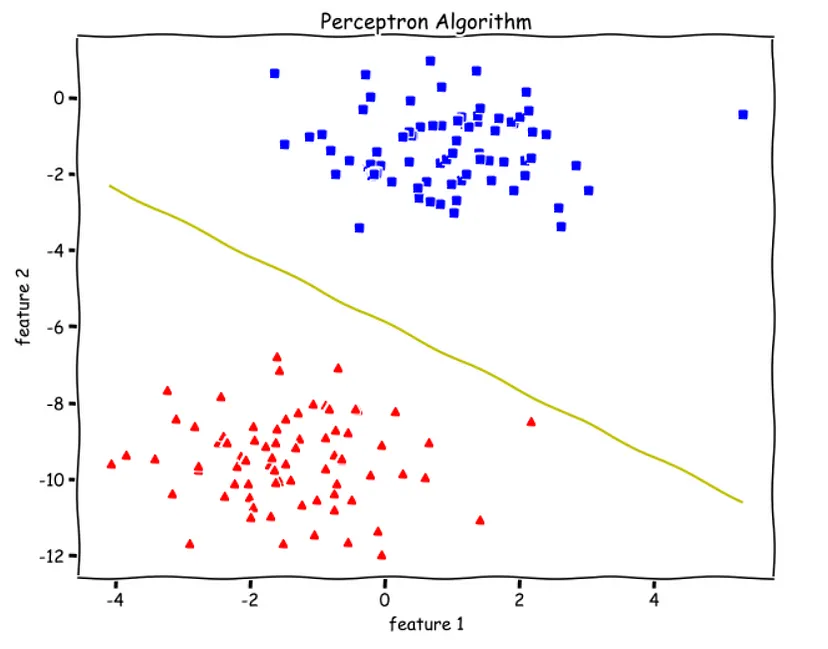

In [6]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return step_function(total)



weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 0
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 1.0

1.0


## Perceptrón multicapa

### El Perceptrón sólo funciona con datos linealmente separables.
### Para solucionar este problema, se combinan perceptrones (neuronas) en forma de redes.





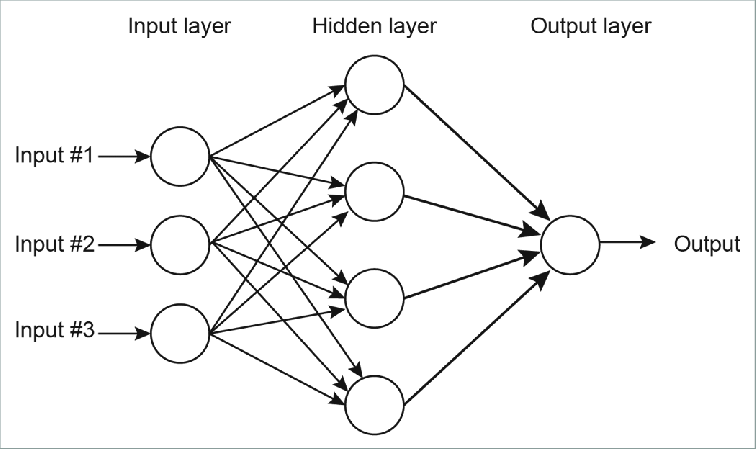



### Donde el output de cada capa es el input de la capa siguiente.

In [7]:
class PerceptronMulticapa:
  '''
  Armamos una red neuronal (combinación de perceptrones) con:
    - 2 inputs
    - una capa oculta con 2 neuronas (h1, h2)
    - una capa output con 1 neurona (o1)
  Cada neurona tiene los mismos pesos y bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # La clase Neuron que definimos arriba
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # Los inputs para o1 son los outputs de h1 y h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = PerceptronMulticapa()
x = np.array([2, 3])
print(network.feedforward(x))

1.0


### Tenemos armada nuestra red neuronal; ahora hay que entrenarla.

### Para esto definimos nuestra función de pérdida (loss function) 
 - ### Entrenar una red significa minimizar su función de pérdida (Error entre la predicción y el valor real)



### Si nuestro algoritmo sólo hiciera las sumas ponderadas en cada neurona y le pasara sus outputs a la capa siguiente, no sería capaz de aprender los pesos para minimizar la función de pérdida.

### Si el algoritmo sólo hace una iteración, no hay aprendizaje.
### Acá aparece la **backpropagation** (retropropagación)


 - ### Usamos Gradient Descent (descenso por gradiente) para optimizar los pesos y los bias que minimicen la función de pérdida

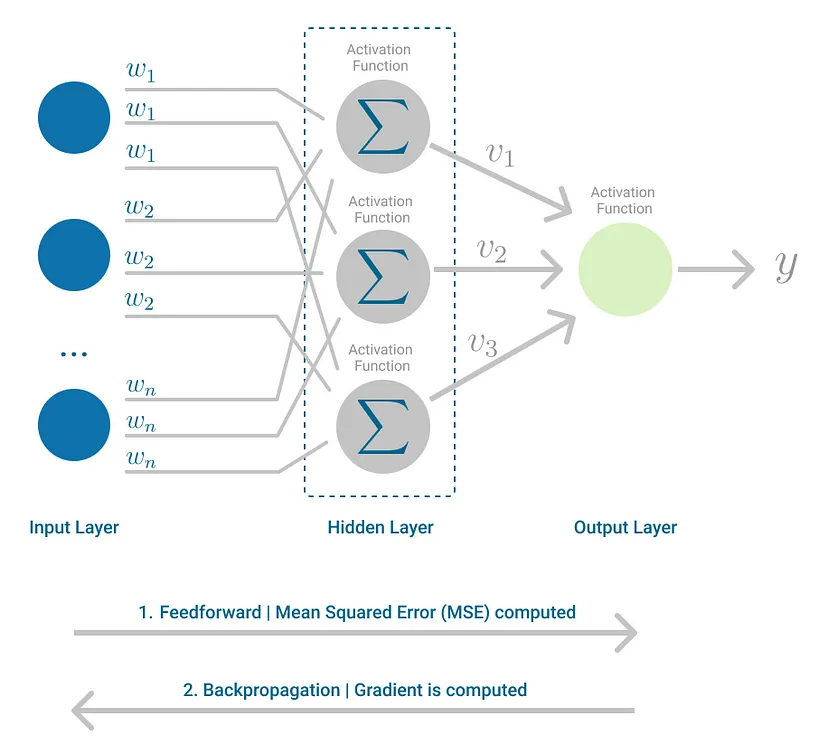


### Fuentes
https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537

http://neuralnetworksanddeeplearning.com/chap1.html

https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9

https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141

StatQuest Descenso por Gradiente: https://www.youtube.com/watch?v=sDv4f4s2SB8
